In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import display,Markdown

In [ ]:
epl = pd.read_csv('EPL.csv')
print(epl.info())
print(epl.head())

epl_condensed = epl[['Season','Team','Pos','Pts','GF','GD', 'Qualification or relegation']]

In [ ]:
# Create update_result function that updates values to shortened versions and name it 
def update_result(result):
    if 'Champions League' in result:
        result = 'Champions League'
    elif 'Europa' in result or 'UEFA' in result:
        result = 'Europa'
    elif 'Relegation' in result:
        result = 'Relegated'
    else:
        result = '-'
    return result

In [ ]:
epl_condensed = epl_condensed.rename(columns={'Qualification or relegation':'Result'})
epl_condensed['Result'] = epl_condensed['Result'].apply(update_result)
print(epl_condensed['Result'].value_counts())

In [ ]:
cl_qual =epl_condensed[epl_condensed.Result == 'Champions League']
cl_qual_stats = cl_qual.groupby('Season').agg({'Pos':'max','Pts':'min','GD':'min'})
print(cl_qual_stats)

In [ ]:
eu_qual =epl_condensed[epl_condensed.Result == 'Europa']
eu_qual_stats = eu_qual.groupby('Season').agg({'Pos':'max','Pts':'min','GD':'min'})
print(eu_qual_stats)

In [ ]:
epl_winners = epl_condensed[epl_condensed['Pos']==1]
epl_winners = epl_winners.reset_index(drop=True)

relegation_zone = epl_condensed[epl_condensed['Pos']==18]
relegation_zone = relegation_zone.reset_index(drop=True)

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(x='Season', y='Pts', data=epl_winners, marker='o', color='#38003c' , label='Winner')
sns.lineplot(x='Season', y='Pts', data=relegation_zone, marker='o', color='#e90052' , label='relegation')

plt.xticks(rotation=90)
plt.title("Points of EPL winners and Relegated teams")
plt.xlabel('Seasons')
plt.ylabel('Points Scored')

plt.show()

In [ ]:
team_counts = epl_condensed['Team'].value_counts()

euro_ids = epl_condensed['Result'].isin(['Europa','Champions League'])
euro_year_counts = epl_condensed[euro_ids]['Team'].value_counts()


In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=team_counts.index,y=team_counts.values, color='#38003c')
plt.ylabel('Years in EPL')
plt.xticks(rotation=90)
plt.show()

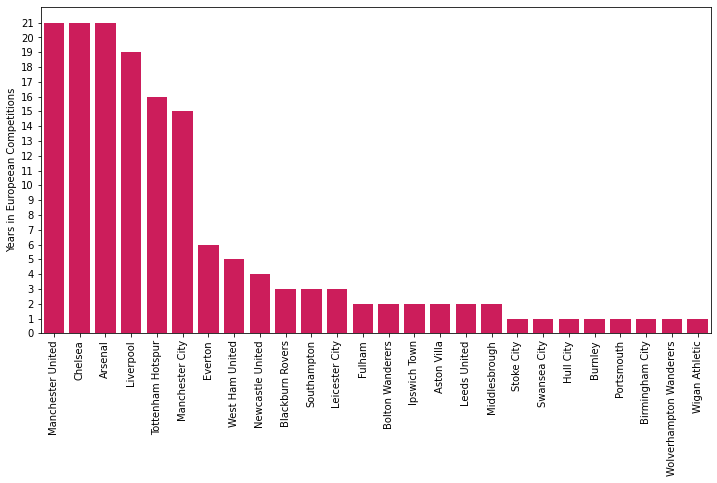

In [304]:
plt.figure(figsize=(12,6))
sns.barplot(x=euro_year_counts.index,y=euro_year_counts.values, color='#e90052',label='Years in Europe')
plt.ylabel('Years in Europeean Competitions')
plt.xticks(rotation=90)
plt.yticks(range(0,22,1))
plt.show()


<ipython-input-303-36a80d4ab7e6>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


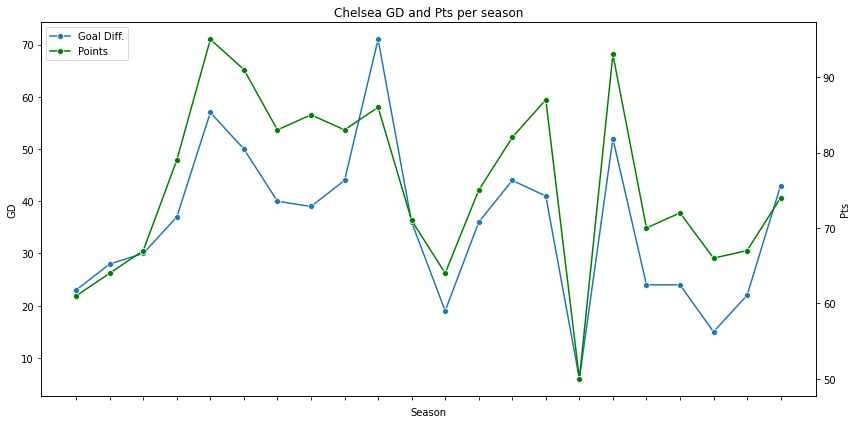

In [303]:
# Filter data for Chelsea
chelsea = epl_condensed[epl_condensed['Team'] == 'Chelsea']

# Set figure size
plt.figure(figsize=(12, 6))

# Plot goal difference (GD) for Chelsea
ax = sns.lineplot(x='Season', y='GD', data=chelsea, label='Goal Diff.', marker='o')

# Create a twin y-axis for points (Pts)
ax2 = ax.twinx()
sns.lineplot(x='Season', y='Pts', data=chelsea, label='Points', ax=ax2, marker='o', color='green')

# Get legend handles and labels for both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Combine legends
ax.legend(lines + lines2, labels + labels2, loc='upper left')

# Remove legend from ax2 (to avoid duplicate legend)
ax2.get_legend().remove()

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Set plot title
plt.title("Chelsea GD and Pts per season")

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


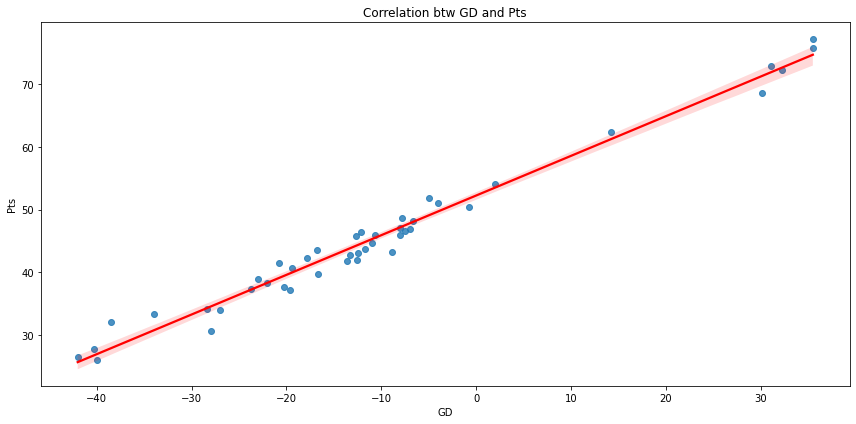

In [306]:
epl_team_stats = epl.groupby('Team').agg({'GD':'mean','Pts':'mean'}).round(1)
plt.figure(figsize=(12, 6))
sns.regplot(x = 'GD',y="Pts",data=epl_team_stats,marker='o',line_kws={'color': 'red'})
plt.title("Correlation btw GD and Pts")
plt.tight_layout()
plt.show()

In [307]:
print(epl_team_stats.Pts.corr(epl_team_stats.GD))

0.9899648930043249
